# Sinusodial Model Experiment
deterministic model using sinusodial function fitted on sample data.

## intial experiment
- train sinusodial regression on sample of data monday - thursday
- get some regression function where we can input time from start and it will give us fullness
- modify data set so instead of time stamps each time stamp represents number of hours from start of day 0:00 hours, mins
represents monday 12:00am
- train data with x as that modified timestamp and y as the fullness for some sample of data from monday-thursday


## future experiment
- ~~sinusodial model is for each garage~~
- look to train with compounded data where all data is combined relative to the start of its week
- also can test what inverse would get us, first data point in front of current time

## imports

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from data_load import load_data
from validation import rmse_validation

## sine function general form

In [2]:
def sinusoidal_model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

## define constants

In [3]:
date_start = pd.to_datetime("2025-02-17 12:00:00 AM")
date_end = pd.to_datetime("2025-02-21 12:00:00 AM")

# inital guess for sin coefficients
initial_guess = [50, 0.005, 500, 50]
garages = [x + " Garage" for x in ["North", "South", "West", "South Campus"]]

## load data

In [4]:
all_data = load_data(date_start, date_end)

## helper funnctions

In [5]:
def sine_fit(data):
    # replace time stamps with time from date_start in minutes instead
    # Extract x and y
    x_data = (data['timestamp'] - date_start).dt.total_seconds() / 60
    y_data = data['fullness']
    
    # fit curve with params
    params, _ = curve_fit(sinusoidal_model, x_data, y_data, p0=initial_guess)
    print("fitted sine function using coefficients:")
    print(params)
    
    # generate x points for sin curves
    x_end = int(x_data.tail(1).values[0])
    all_x_vals = np.linspace(0, x_end, num=1000)
    
    return x_data, all_x_vals, y_data, sinusoidal_model(x_data, *params), sinusoidal_model(all_x_vals, *initial_guess)

def model_plot(x_data, all_x_data, y_data, fit, guess_fit):
    plt.scatter(x_data, y_data, color='blue', alpha=0.6, label='raw data')
    
    plt.plot(x_data, y_data, color='blue', alpha=0.6, linestyle='--')
    plt.plot(x_data, fit, color='red', label='fitted curve')
    
    # plt.plot(all_x_data, guess_fit, color='orange', label='init guess curve')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Fullness')
    plt.title('Sinusoidal Regression')
    plt.show()

## perform regression

### north garage model

In [6]:
north_data = all_data[all_data['garage name'] == garages[0]]

north_fit_params = sine_fit(north_data)

fitted sine function using coefficients:
[5.38809038e+01 4.36672403e-03 5.00665498e+02 4.19897973e+01]


#### plot north model

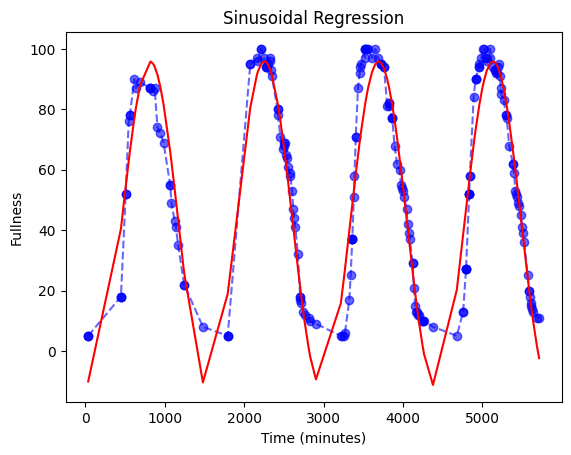

In [7]:
model_plot(*north_fit_params)

### south garage model

In [8]:
south_data = all_data[all_data['garage name'] == garages[1]]

south_fit_params = sine_fit(south_data)

fitted sine function using coefficients:
[4.00081991e+01 4.37958351e-03 5.00681586e+02 6.04291404e+01]


#### plot south model

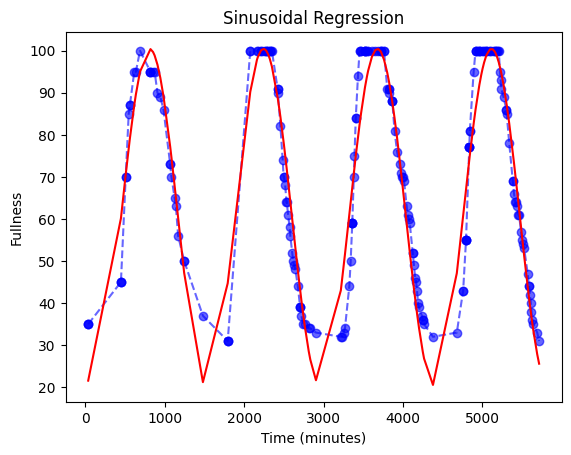

In [9]:
model_plot(*south_fit_params)

### west garage model

In [10]:
west_data = all_data[all_data['garage name'] == garages[2]]

west_fit_params = sine_fit(west_data)

fitted sine function using coefficients:
[4.69891011e+01 4.37150348e-03 5.00690508e+02 4.67805969e+01]


#### plot west model

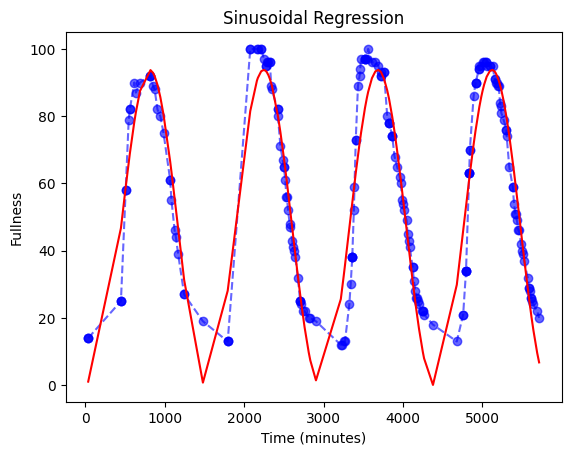

In [11]:
model_plot(*west_fit_params)

### south campus garage model

In [12]:
south_campus_data = all_data[all_data['garage name'] == garages[3]]

south_campus_fit_params = sine_fit(south_campus_data)

fitted sine function using coefficients:
[-1.55741961e+01  4.27105644e-03  5.02784896e+02  2.06968731e+01]


#### plot south campus model

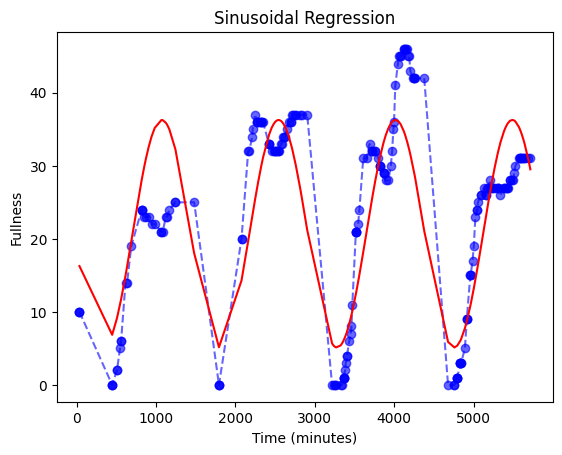

In [13]:
model_plot(*south_campus_fit_params)

## model validation
calc RMSE for each garage when comparing predictions to raw data 

In [14]:
# pass in raw data and predicted sinusoidal regression values 
north_rmse = rmse_validation(north_fit_params[2], north_fit_params[3])
south_rmse = rmse_validation(south_fit_params[2], south_fit_params[3])
west_rmse = rmse_validation(west_fit_params[2], west_fit_params[3])
south_campus_rmse = rmse_validation(south_campus_fit_params[2], south_campus_fit_params[3])

print(f'north rmse: {north_rmse}')
print(f'south rmse: {south_rmse}')
print(f'west rmse: {west_rmse}')
print(f'south campus rmse: {south_campus_rmse}')

north rmse: 10.194984227846872
south rmse: 7.325141060258042
west rmse: 9.926047423035502
south campus rmse: 7.077802851114017
